In [52]:
from robustcontrol import utils
import sympy
import numpy as np
from sympy.abc import i, j
from matplotlib import pyplot as plt

In [67]:
G = np.matrix([[100, 102], [100, 100]])

# RGA

In [82]:
utils.RGA(G), utils.RGAnumber(G, np.eye(2))

(array([[-50.,  51.],
        [ 51., -50.]]),
 204.00000000000114)

In [85]:
w = np.logspace(-2, 2, 20)
s = 1j*w

def Gnp(s):
    return G
def g11(s):
    return Gnp(s)[0, 0]
def g12(s):
    return Gnp(s)[0, 1]
def g21(s):
    return Gnp(s)[1, 0]
def g22(s):
    return Gnp(s)[1, 1]

def λ_11(s):
    return 1/(1 - ((g12(s)*g21(s))/(g11(s)*g22(s))))

λ11= np.array([λ_11(i) for i in s])
λ21 = 1 - λ11



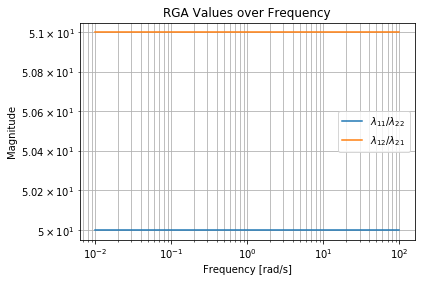

In [87]:
plt.figure(1)
plt.title('RGA Values over Frequency')
plt.xlabel(r'Frequency [rad/s]')
plt.ylabel(r'Magnitude')
plt.loglog(w, abs(λ11), label='$\lambda_{11}/\lambda_{22}$')
plt.loglog(w, abs(λ21), label='$\lambda_{12}/\lambda_{21}$')
plt.grid(b=None, which='both', axis='both')
plt.legend()


### This is an ill conditioned plant as can be seen by the $ \lambda_{11} $ = -50 over all freq 

# Disturbances

In [75]:
s = 0
gd1 = np.matrix([[10/(s + 1)], [10/(s + 1)]])
gd2 = np.matrix([[1/(s + 1)], [-1/(s + 1)]])

In [78]:
_, yd1, condno1 = utils.distRej(G, gd1)
_, yd2, condno2= utils.distRej(G, gd2)

condno1 , yd1 , condno2 , yd2

(1.4213199846401867,
 [0.7071067811865475, 0.7071067811865475],
 202.01252492109865,
 [0.7071067811865475, -0.7071067811865475])

In [79]:
Gu1 = G[:, 0]
Gu2 = G[:, 1]

G1 = 1 / np.linalg.norm(Gu1, 2)# Returns largest sing value of gd(wj)
u1 = G1 * Gu1

G2 = 1 / np.linalg.norm(Gu2, 2)# Returns largest sing value of gd(wj)
u2 = G2 * Gu2

u1, u2

(matrix([[0.70710678],
         [0.70710678]]),
 matrix([[0.71407284],
         [0.70007141]]))

##### 1) d1 and u1 is in the same direction, and thus d1 is easily rejected
##### 2) d2 is more difficult to control also as its condition number is 202.01 compared to 1.42 for d1